## Image Processing

In [1]:
import cv2
import time
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import undetected_chromedriver as uc
from PIL import Image
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

df = pd.read_csv('./congress2023-04-11.csv', index_col=0)
df = df.reset_index()
print(len(df.index))
print(df.columns)

2449
Index(['index', 'name', 'photo', 'party'], dtype='object')


In [2]:
import pyautogui
from selenium.webdriver import ActionChains

for i, value in enumerate(df['photo']):
    try:
        #get id
        #filename = (value)[12:23]
        
        options = uc.ChromeOptions() 
        options.headless = False
        #options.add_argument("download.default_directory=/home/mds/586_finalproject/data")
        driver = uc.Chrome(use_subprocess=True, options=options)
        driver.get('https://www.congress.gov' + value)
        actions = ActionChains(driver);
        el = driver.find_element('xpath', '//*[body]')
        actions.context_click(el).perform();
        time.sleep(0.5)
        pyautogui.press('down', presses=2)
        time.sleep(1.5)
        pyautogui.press('enter')
        time.sleep(1.2)
        pyautogui.press('enter')
        time.sleep(1.2)
        #pyautogui.write(filename)
        pyautogui.click(x=1550, y=110)
        time.sleep(2)
        #pyautogui.press('enter')
        driver.quit()
        time.sleep(1.6)
    except:
        pass
    
    if i%50 == 0:
        print(str(i), 'out of', str(len(df.index)))
        
    #if i == 3:
    #    break

0 out of 2449
50 out of 2449
100 out of 2449
150 out of 2449
200 out of 2449
250 out of 2449
300 out of 2449
350 out of 2449
400 out of 2449
450 out of 2449
500 out of 2449
550 out of 2449
600 out of 2449
650 out of 2449
700 out of 2449
750 out of 2449
800 out of 2449
850 out of 2449
900 out of 2449
950 out of 2449
1000 out of 2449
1050 out of 2449
1100 out of 2449
1150 out of 2449
1200 out of 2449
1250 out of 2449
1300 out of 2449
1350 out of 2449
1400 out of 2449
1450 out of 2449
1500 out of 2449
1550 out of 2449
1600 out of 2449
1650 out of 2449
1700 out of 2449
1750 out of 2449
1800 out of 2449
1850 out of 2449
1900 out of 2449
1950 out of 2449
2000 out of 2449
2050 out of 2449
2100 out of 2449
2150 out of 2449
2200 out of 2449
2250 out of 2449
2300 out of 2449
2350 out of 2449
2400 out of 2449





## Plotting all images

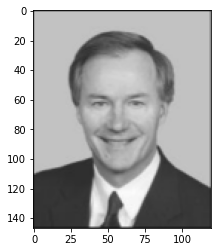

In [4]:
#plt.imshow(everything.loc[0, 'face']) #, cmap = 'gray'
dems = pd.read_pickle('./democrat_faces.pkl')
repubs = pd.read_pickle('./republican_faces.pkl')
everything = dems.append(repubs)
everything = everything.sample(frac=1).reset_index(drop=True)

import matplotlib.pylab as plt
import time
from IPython import display
%matplotlib inline


for i in range(len(everything.index)):
    try:
        plt.imshow(everything.loc[i, 'face'])
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
    except KeyboardInterrupt:
        break


## Old method



In [2]:
#get pixel function
def url_to_image(url):
    options = uc.ChromeOptions() 
    options.headless = True 
    driver = uc.Chrome(use_subprocess=True, options=options)
    driver.get('chrome://settings/')
    driver.execute_script('chrome.settingsPrivate.setDefaultZoom(1.4);')
    driver.get(url)
    with open('temp.png', 'wb') as file:
    #identify image to be captured
       l = driver.find_element('xpath', '//*[body]')
    #write file
       file.write(l.screenshot_as_png)
    driver.quit()
    time.sleep(2)
    img = cv2.imread('./temp.png')
    # return the image
    return img

#crop black background
def crop_image(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    _,thresh = cv2.threshold(gray,15,255,cv2.THRESH_BINARY)
    contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    return img[y:y+h,x:x+w]

#resize image keep aspect ratio
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

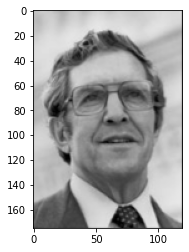

In [3]:
img1 = url_to_image("https://www.congress.gov" + df.loc[0, 'photo'])
plt.imshow(image_resize(crop_image(img1), width=120))

In [3]:
#main loop

face = []
name = []

for i, value in enumerate(df['name']):
    try:
        img1 = url_to_image("https://www.congress.gov" + df.loc[i, 'photo'])
        cropped = crop_image(img1)
        face.append(image_resize(cropped, width=120))
        name.append(value)
    except:
        pass
    
    if i%50 == 0:
        print(str(i), 'out of', str(len(df.index)), '... Check:', str(len(name)))

facedf = pd.DataFrame({'name': name, 'face': face})

#remerge by ids to get covariates
everything = pd.merge(facedf, df, how='left')

#save it!
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
everything.to_pickle('croppedfaces.pkl')

0 out of 2449 ... Check: 1
50 out of 2449 ... Check: 51
100 out of 2449 ... Check: 101
150 out of 2449 ... Check: 151
200 out of 2449 ... Check: 201
250 out of 2449 ... Check: 251
300 out of 2449 ... Check: 301
350 out of 2449 ... Check: 351
400 out of 2449 ... Check: 401
450 out of 2449 ... Check: 451
500 out of 2449 ... Check: 501
550 out of 2449 ... Check: 551
600 out of 2449 ... Check: 601
650 out of 2449 ... Check: 650
700 out of 2449 ... Check: 700
750 out of 2449 ... Check: 750
800 out of 2449 ... Check: 800
850 out of 2449 ... Check: 850
900 out of 2449 ... Check: 900
950 out of 2449 ... Check: 950
1000 out of 2449 ... Check: 1000
1050 out of 2449 ... Check: 1050
1100 out of 2449 ... Check: 1100
1150 out of 2449 ... Check: 1150
1200 out of 2449 ... Check: 1200
1250 out of 2449 ... Check: 1250
1300 out of 2449 ... Check: 1300
1350 out of 2449 ... Check: 1350
1400 out of 2449 ... Check: 1400
1450 out of 2449 ... Check: 1450
1500 out of 2449 ... Check: 1500
1550 out of 2449 ... Ch

In [5]:
#split df into two so i can push it to github
import pandas as pd
everything = pd.read_pickle('./croppedfaces.pkl')
dems = everything.loc[df.party == 'D']
repubs = everything.loc[df.party == 'R']
dems.to_pickle('democrat_faces.pkl')
repubs.to_pickle('republican_faces.pkl')

In [4]:
import pandas as pd
everything = pd.read_pickle('./croppedfaces.pkl')
everything['party'].value_counts()

D    1020
R     991
Name: party, dtype: int64